# *Ab* *initio* molecular dynamics of the vibrational motion of HF

### Part 1:  Analysis of an *ab* *initio* potential energy surfaces (PES)
We are going to use what is often referred to as an *ab* *initio* potential energy surface of the diatomic
molecule hydrogen fluoride.  This potential energy surface accounts repulsion between all electrons in the molecule, and the attraction between electrons and protons in the molecule, at different separations between the H and F atoms according as dictated by quantum mechanical *theories*.  This is in fact quite different from *model* potentials (e.g. the Lennard-Jones potential and the Harmonic Potential) we studied in class.  The calculations based on quantum mechanical theories have already been performed for you, and we will just use the results; we will learn more about these theories in Physical Chemistry II.  We will, however, make a comparison between the more accurate *theoretical* results and a model potential in this lab.

We will start by importing a few useful libraries - these are packages of python code that provide capabilities to do numerical calculations, plot data, etc.

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline

Let's also demonstrate just a few basic programming concepts in python here!

Now let's create arrays (or lists) for the bond length and energies at each bond length.  Let's have our bond lengths
spane 0.5 - 2.3 $\overset{\circ}{A}$; note that should use finer resolution for short bondlengths than our longer bondlengths because we want to be sure we accurately represent the minimum energy point on the PES!

In [12]:
molecules = []
r_array = [0.5, 0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3] 
E_array = [-99.65145319155353, -99.8994262443721,-100.06621001317194,-100.17756325854646,-100.25063259195414,-100.2970313588523,-100.32474168482375,-100.33931605978479,-100.34465565789081,-100.34352787324143,-100.33791544225228,-100.31857920174716,-100.29403975969775,-100.26820624042988,-100.24311492569184,-100.21980547092805,-100.19879112534593,-100.18029259214076,-100.16434868570335,-100.15087255990257,-100.13968771534014,-100.13055798203477,-100.12321514624568,-100.11738316835266]

The values above came from quantum chemistry calculations, specifically Hartree-Fock theory.  
In principle, we could compute these **from** a Jupyter notebook with a special quantum chemistry 
package called *psi4* installed... however, the installation has been vexing for Windows so we do not.  

The relevant code blocks to use *psi4* to compute these surfaces follows for those interested.  After executing the next two blocks of code, the Hartree-Fock energy as a function of bond-length would be stored in the list *RHF_E_array*.

In [13]:
### import psi4 package
import psi4

ModuleNotFoundError: No module named 'psi4'

In [14]:
### template for the z-matrix
mol_tmpl = """H
F 1 **R**"""

### array for different instances of the HF molecule
molecules =[]
### array for the different RHF energies for different HF bond-lengths
RHF_E_array = []

### loop over the different bond-lengths, create different instances
### of HF molecule
for r in r_array:
    molecule = psi4.geometry(mol_tmpl.replace("**R**", str(r)))
    molecules.append(molecule)
    
### loop over instances of molecules, compute the RHF, MP2, and CCSD
### energies and store them in their respective arrays
for mol in molecules:
    energy = psi4.energy("SCF/cc-pVTZ", molecule=mol)
    RHF_E_array.append(energy)
    


NameError: name 'psi4' is not defined

We can use matplotlib to plot the energies in 'E_array' against the bondlengths in 'r_array':

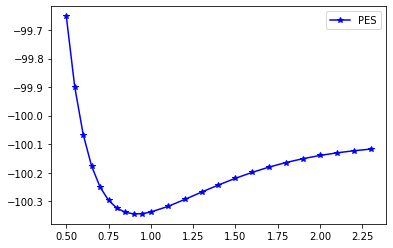

In [15]:
plt.plot(r_array, E_array, '-b*', label='PES')
plt.legend()
plt.show()

Now that you have the raw data, we will interpolate this data using cubic splines.  This will permit us to 
estimate the potential energy at any arbitrary separation between 0.5 and 2.3 Angstroms.

The general syntax for creating a cubic spline object is as follows:

`spline = InterpolatedUnivariateSpline(x-data, y-data, k=3)`

#### Note on units
The energies we used above are in a unit called Hartrees, which are the atomic unit of energy.  We have so far been specifying our separation in Angstroms (**not the atomic unit of length**) so we are in a mixed unit system.  When we generate our spline, we will use an array of bond lengths in atomic units as the x-data and the energies in atomic units as the y-data, which will yield a PES purely in atomic units.  Therefore, the first thing we will do before creating the spline is to create an array of bond lengths in atomic units (~1.89 * bond lengths in Angstroms is the bond length in atomic units); we will create a cubic spline (called E_spline) that hold the PES data in atomic units.

In [16]:
''' Create array of bond lengths in atomic units called r_array_au and fit PES to splines in this cell! '''
r_array_au = np.array(r_array) * 1.89

''' create a cubic spline for the energies vs bond length in atomic units here! '''
E_spline = InterpolatedUnivariateSpline(r_array_au, E_array, k=3)



Now we can plot the splines against the PES data to make sure our splines were generated properly.

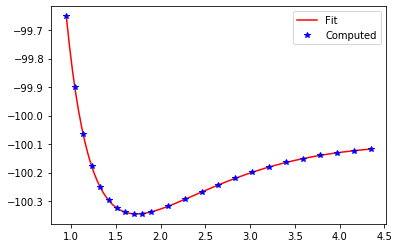

In [17]:
### form a much finer grid to evaluate spline object at
r_fine = np.linspace(0.5*1.89,2.3*1.89,200)
### compute the interpolated/extrapolated values for Energy on this grid
E_fine = E_spline(r_fine)


### plot the interpolated data with lines against computed data in *'s
plt.plot(r_fine, E_fine, 'red', label='Fit')
plt.plot(r_array_au, E_array, 'b*', label='Computed')
plt.legend()
plt.show()


### Part 2:  Computation of Forces and related quantities and their importance in Newton's law
We can derive a number of important quantities just from the potential energy surfaces we have computed.  For example, we estimate the equilibrium bond length by finding the separation at which the potential is minimum; note this would also be the position that the force goes to zero:
\begin{equation}
\frac{d}{dr} V(r_{eq}) = -F(r_{eq}) = 0.
\end{equation}

The force as a function of separation plays a significant role in the vibrational motion of the molecule, as we will see shortly.  

To compute the force, we can use the fact
that the spline objects (which we previously created) can be directly differentiated using the following syntax:

`spline_derivative = spline.derivative()`

Once computed, plot each spline against the r_fine array previously created!
#### What unit system do you think the forces are in?

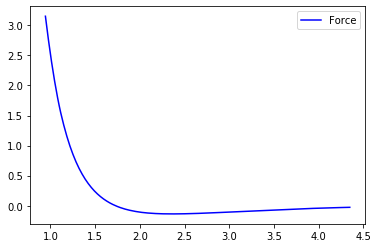

In [18]:
''' Differentiate splines and plot resulting forces in this cell! '''
Force_spline = E_spline.derivative()

### define new array called "Force_fine"
Force_fine = Force_spline(r_fine)
### plot!
plt.plot(r_fine, -1*Force_fine, 'blue', label='Force')
plt.legend()
plt.show()


#### Equilibrium bond length 
Next we will find where the minimum of the potential energy surfaces are and use that
to find the equilibrium bond length, making use of numpy's argmin function to find the
index corresponding to the minimum value in a numpy array:

In [19]:
### Find Equilibrium Bond-Lengths for each level of theory
Req_idx = np.argmin(E_fine)

### find the value of the separation corresponding to that index
Req = r_fine[Req_idx]

### print equilibrium bond-lengths at each level of theory!
print(" Equilibrium bond length is ",Req, "atomic units")
print(" Req is ",Req/1.89, "Angstroms")

### mass of hydrogen in atomic units
mH = 1836.
### mass of fluorine in atomic units
mF = 34883.

''' compute reduced mass and store it to variable mu here! '''
mu = mH * mF/ (mH + mF)
### Print the reduced mass!
print("Reduced mass is ",mu, "atomic units")

 Equilibrium bond length is  1.7313919597989949 atomic units
 Req is  0.9160804020100503 Angstroms
Reduced mass is  1744.1974999319154 atomic units


#### At this point, take a moment to compare your equilibrium bond length to the experimentally-determined (i.e. the "true" bond length) of HF.  You probably don't know the experimental bond length of HF off the top of your head, so look it up!

#### Harmonic Frequency 
You might have learned that the Harmonic Oscillator potential, which is a reasonable model for the vibrational motion of diatomic molecules near their equilibrium bond length, is given by
\begin{equation}
V(r) = \frac{1}{2} k (r-r_{eq})^2 + V_0
\end{equation}
and that the vibrational frequency of the molecule within the Harmonic oscillator model is given by
\begin{equation}
\nu = \frac{1}{2\pi}\sqrt{\frac{k}{\mu}}
\end{equation}
where $\mu$ is the reduced mass of the molecule and $k$ is known as the force constant.  
We can estimate the force constant as
\begin{equation}
k = \frac{d^2}{dr^2} V(r_{eq}),
\end{equation}
and the reduced mass of HF is defined as
\begin{equation}
\mu = \frac{m_H \cdot m_F}{m_H + m_F},
\end{equation}
where $m_H$ and $m_F$ are the masses of Hydrogen and Fluoride, respectively.

Let's go ahead and get the force constant, print the value, 
and estimate the potential energy within the Harmonic approximation!  Just like we were able to differentiate our PES splines to get a force spline, we can differentiate a force spline to get a curvature spline (which we can call Curvature_spline); the force constant will then be the curvature evaluated at the equlibrium bond length.


In [20]:
''' Differentiate force splines to get curvatures and determine force constants in this cell!'''

Curvature_Spline = Force_spline.derivative()


''' Get force constant by evaluating Curvature_spline at Req and store it
    to the variable Force_Constant '''
Force_Constant = Curvature_Spline(Req)

### Print the Force Constant
print("Force Constant is ",Force_Constant)

''' Compute the vibrational frequency and store it to the variable nu '''
nu = 1/(2*np.pi) * np.sqrt(Force_Constant/mu)
### Print the frequency!
print("Frequency is ",nu)

### This is the vibrational energy in atomic units in terms of the frequency
E_vib_au = 2 * np.pi * nu
print("Vibrational Energy at Level is ",E_vib_au, "atomic units")



Force Constant is  0.6400845065940467
Frequency is  0.0030488844083666543
Vibrational Energy at Level is  0.019156705717938288 atomic units


The vibrational energy in atomic units can be converted to more familiar 
spectroscopic units to allow comparision to the experimental vibrational frequency 
of HF.  For example, this [link](http://halas.rice.edu/conversions) has a very useful unit converter from energy to spectroscopic units like wavenumbers ($cm^{-1}$) or nanometers ($nm$).  It might be useful first to convert your vibrational energy in atomic units to electron volts by using the fact that 1 atomic unit of energy is equal to 27.211 electron volts.

Now that we have the force constants, let's define an array for the harmonic potential (Harm_Pot) that store the harmonic potentials at each level of theory evaluated at the different bond lengths (in atomic units) stored in the array r_fine; recall the definition of the Harmonic potential is 
\begin{equation}
V(r) = \frac{1}{2} k (r-r_{eq})^2 + V_0,
\end{equation}
where we can use $E(r_{eq})$ as $V_0$.

In [21]:
''' Create arrays of Harmonic potentials in this cell! '''
Harm_Pot = 0.5 * Force_Constant * (r_fine - Req)**2 + E_spline(Req)


Let's plot the resulting Harmonic potential against the *ab* *initio* potential near the equilibrium geometry

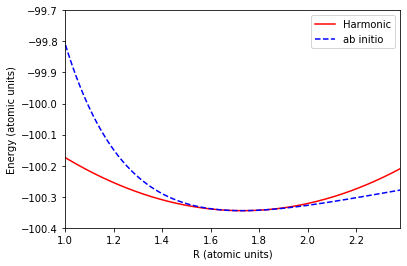

In [22]:
### plot RHF harmonic potential vs RHF ab initio potential!
plt.plot(r_fine, Harm_Pot, 'red', label='Harmonic')
plt.plot(r_fine, E_fine, 'b--', label='ab initio' )
plt.xlabel('R (atomic units)')
plt.ylabel('Energy (atomic units)')
### these limits were chosen to zoom in on region of the RHF PES that is approximately
### harmonic
plt.xlim(1.0, (1.69+0.69))
plt.ylim(-100.4,-99.7)
plt.legend()
plt.show()

### Part 3: Solving Newton's equation of motion to simulate the dynamics
Next, we want to actually simulate the dynamics of the HF molecule on these *ab* *initio* potential energy surfaces.  To do so, we need to solve Newton's equations of motion subject to some initial condition for the position (separation) and momentum (in a relative sense) of the particles.  Newton's equations can be written
\begin{equation}
F(r) = \mu \frac{d^2}{dt^2}r
\end{equation}
where $\mu$ is the reduced mass in atomic units and $F(r)$ is the Force vs separation in atomic units that was determined previously.  

#### What will be the accelation of the bond stretch when H is separated by F by 3 atomic units?  You can express your acceleration in atomic units, also.



In [23]:
""" Compute acceleration at Hartree-Fock level when HF is displaced by 3 atomic units in this cell! """

a = -1*Force_spline(3)/mu
print(a)


-6.096541723090522e-05


#### Numerically solving Newton's equation of motion 
If the acceleration, position, and velocity of the bond stretch coordinate are known at some instant in 
time $t_i$, then the position and velocity can be estimated at some later time $t_{i+1} = t_i + \Delta t$:
\begin{equation}
r(t_i + \Delta t) = r(t_i) + v(t_i)\Delta t + \frac{1}{2}a(t_i)\Delta t^2
\end{equation}
and
\begin{equation}
v(t_i + \Delta t) = v(t_i) + \frac{1}{2} \left(a(t_i) + a(t_i + \Delta t)  \right) \Delta t.
\end{equation}
This prescription for updating the velocities and positions is known as the Velocity-Verlet algorithm.  
Note that we need to perform 2 force evaluations per Velocity-Verlet iteration: one corresponding
to position $r(t_i)$ to update the position, and then a second time at the updated position $r(t_i + \Delta t)$
to complete the velocity update.  

We will create a function called Velocity_Verlet that takes the arguments r_curr, v_curr, mu, force_spline, and timestep and returns a 2-element array containing the updated position (r) and velocity (v) value.

In [24]:
''' Velocity Verlet function goes in this cell! '''
def Velocity_Verlet(r_curr, v_curr, mu, force_spline, dt):
    a_curr = -1*Force_spline(r_curr)/mu
    r_fut = r_curr + v_curr*dt + 0.5*a_curr*dt**2
    a_fut = -1*Force_spline(r_fut)/mu
    v_fut = v_curr + 0.5*(a_curr + a_fut)*dt
    
    ### Velocity Verlet function will compute r_new and v_new,
    ### and return them in a list!
    return [r_fut, v_fut]

    

### Validating Velocity-Verlet algorithm with the Harmonic Oscillator
Newton's equation of motion can be solved analytically for the Harmonic oscillator, and we can use this fact to validate our Velocity-Verlet algorithm (which provides an *approximate* solution to Newton's equation of motion for arbitrary potentials).  That is,
the vibrational motion of a diatomic subject to a Harmonic potential predicted 
by the Velocity-Verlet algorithm should closely match the analytical solution. Analytically, 
the bond length as a function of time for a diatomic experiencing a harmonic potential is given by
\begin{equation}
r(t) = A \: {\rm sin}\left(\sqrt{\frac{k}{\mu}} t + \phi \right) + r_{eq},
\end{equation}
where $A = \frac{r(0)}{{\rm sin}(\phi)}$, $r(0)$ is the initial separation, and $\phi$ is the initial phase of the cycle; note that corresponding to this initial separation is 
an initial velocity given by 
\begin{equation}
v(0) = A \: \sqrt{\frac{k}{\mu}} {\rm cos}\left( \phi \right).
\end{equation}

Let's define a function harmonic_position that takes arguments of $\sqrt{\frac{k}{\mu}}$ (om), $A$ (amp), $\phi$ (phase), $r_{eq}$ (req), and time (t), and returns the separation. 


In [25]:
''' Analytic solution to Harmonic Oscillator r(t) goes here! '''
def harmonic_position(om, amp, phase, req, t):
    amp * np.sin(om*t + phase) + req
    return  amp * np.sin(om*t + phase) + req
    ### this function will compute and return r(t)
    

The following code block will call the Velocity Verlet algorithm 10,000 times with a 
timestep of 0.1 atomic units per timestep and will compare the resulting trajectory of bond length vs time (all in atomic units) to the analytic result for the Harmonic oscillator; we will initiate the bond length as being 0.2 atomic units **longer** than $r_{eq}$ with an initial phase of $\frac{\pi}{4}$.

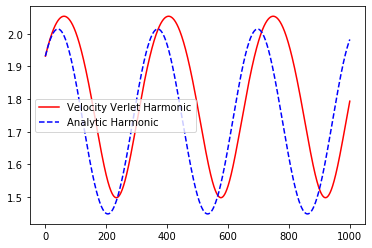

In [28]:
### how many updates do you want to perform?
N_updates = 10000

### establish time-step for integration to be 0.02 atomic units... this is about 0.0005 femtoseconds
### so total time is 200000*0.02 atomic units of time which is ~9.6e-13 s, or 960 fs
dt = 0.1

### results from VV algorithm
hr_vs_t = np.zeros(N_updates)
hv_vs_t = np.zeros(N_updates)
### analytic result for r(t)
ar_vs_t = np.zeros(N_updates)
### array to store time in atomic units
t_array = np.zeros(N_updates)

### establish some constants relevant for analytic solution
### harmonic freq
om = np.sqrt(Force_Constant/mu)
### initial displacement 
x0 = 0.2
### amplitude for analytic solution
Amp = x0/(np.sin(np.pi/4))
### initial velocity
v0 = Amp * om * np.cos(np.pi/4)

hr_vs_t[0] = Req+x0
hv_vs_t[0] = v0

### We need a spline object for the harmonic force to pass to the Velocity Verlet algorithm,
### let's get that now!

### spline for Harmonic potential using RHF_k
Harm_Pot_spline = InterpolatedUnivariateSpline(r_fine, Harm_Pot, k=3)
### RHF harmonic force
Harm_Force = Harm_Pot_spline.derivative()


### first Velocity Verlet update
result_array = Velocity_Verlet(hr_vs_t[0], hv_vs_t[0], mu, Force_spline, dt)
### first analytic result
ar_vs_t[0] = harmonic_position(om, Amp, np.pi/4, Req, 0)
### do the update N_update-1 more times
for i in range(1,N_updates):
    ### store current time
    t_array[i] = dt*i
    ### Compute VV update using ab initio Force
    result_array = Velocity_Verlet(result_array[0], result_array[1], mu, Force_spline, dt)
    ### Compute VV update using Harmonic model Force
    #result_array = Velocity_Verlet(result_array[0], result_array[1], mu, Harm_Force, dt)
    ### store results from VV update
    hr_vs_t[i] = result_array[0]
    hv_vs_t[i] = result_array[1]
    ### compute and store results from analytic solution
    ar_vs_t[i] = harmonic_position(om, Amp, np.pi/4, Req, dt*i)

### Plot result and compare!
#plt.plot(hr_vs_t, mu*hv_vs_t, 'red', label="Velocity Verlet")
plt.plot(t_array, hr_vs_t, 'red', label="Velocity Verlet Harmonic")
plt.plot(t_array, ar_vs_t, 'b--', label="Analytic Harmonic")
plt.legend()
plt.show()


#### How are the dynamics different when the *ab* *initio* forces are used?  Try to identify at least two quantitative ways in which you can distinguish the harmonic motion from the motion deriving from the *ab* *initio* forces.  

#### Can you estimate the frequency from the *ab* *initio* trajectories?  How does this frequency compare with the Harmonic approximation and with the experimental value?

### For further consideration: What makes a "sensible range of values" for position and velocity?

In this case, we will initialize the position to be a random number between 1.0 and 4.0; for the velocity, we will use the fact that we can estimate the expectation value of kinetic energy for a very similar system (the Harmonic oscillator) in the ground state as follows:
\begin{equation}
\langle T \rangle = \frac{1}{2} E_g,
\end{equation}
where $E_g$ is the ground state of the Harmonic oscillator (this is making use of the Virial theorem).  We can easily
find the ground state energy in the Harmonic oscillator approximation of $HF$ using our frequency calculation described above as
\begin{equation}
E_g = \frac{1}{2} h \nu,
\end{equation}
which implies the kinetic energy expectation value is
\begin{equation}
\langle T \rangle = \frac{h}{8 \pi} \sqrt{\frac{k}{\mu}}.
\end{equation}
Since we can say classically that the kinetic energy is given by $T = \frac{1}{2}\mu v^2$, we can estimate the velocity of the bond stretch as follows:
\begin{equation}
v = \sqrt{\frac{2 \langle T \rangle}{\mu}} = \sqrt{ \frac{\hbar \sqrt{\frac{k}{\mu}}}{2\mu}}
\end{equation}
where we have simplified using the fact that $\hbar = \frac{h}{2\pi}$ ($\hbar$ has the value 1 in the atomic unit system we are using up to this point!).  We will assume that a reasonable
range of velocities spans plus or minus 3 times this "ground-state" velocity.


Answers to Questions Above:

1. How are the dynamics different when the ab initio forces are used? Try to identify at least two quantitative ways in which you can distinguish the harmonic motion from the motion deriving from the ab initio forces.

        The dynamics are different when the ab initio forces are used becuase in this case, the ab initio gives a longer bond length compared to the harmonic motion and the frequency is also larger with the the ab initio. You can distinguish the harmonic motion from the motion deriving from the ab intio forces by looking at the potential and what happens to the bond length by compressing and stretching. The ab initio experiences a greater force when compressing and harmonic motion experiences greater when stretching. 
        
 2. Can you estimate the frequency from the ab initio trajectories? How does this frequency compare with the Harmonic approximation and with the experimental value?
 
     The estimated frequency from the ab initio trajectories is lower than the harmonic approximation and experimental value of 1.7. The frequency as estimated by the ab initio trajectories is about 1.8amu or  0.9 ev, after converting to nm, the frequency is 1377 nm which is less than the Harmonic approximation using 1.7 amu, or 0.88 converting to nm is 1399 nm. 